# Using Regression to Predict House Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 'MEDV' == target(median value of owner occupied homes in $1000s)
df = pd.read_csv('../data/boston.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NX         506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [3]:
df.sample(5).T

,415,241,46,197,162
CRIM,18.0846,0.10612,0.18836,0.04666,1.83377
ZN,0.0000,30.00000,0.00000,80.00000,0.00000
INDUS,18.1000,4.93000,6.91000,1.52000,19.58000
CHAS,0.0000,0.00000,0.00000,0.00000,1.00000
NX,0.6790,0.42800,0.44800,0.40400,0.60500
RM,6.4340,6.09500,5.78600,7.10700,7.80200
AGE,100.0000,65.10000,33.30000,36.60000,98.20000
DIS,1.8347,6.33610,5.10040,7.30900,2.04070
RAD,24.0000,6.00000,3.00000,2.00000,5.00000
TAX,666.0000,300.00000,233.00000,329.00000,403.00000


In [4]:
# create our features and target arrays
X = df.drop('MEDV', axis=1).values
y = df.MEDV.values
print(X[:3])
print(y[:5])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]
[24.  21.6 34.7 33.4 36.2]


### Predict the house price from a single feature

We'll predict the house price based on the number of rooms in the house, `RM`, or the '6th' column, index `5`.

In [5]:
X_rooms = X[:, 5]
print(X_rooms.shape)
print(X_rooms[:5])

(506,)
[6.575 6.421 7.185 6.998 7.147]


In [6]:
print(type(X_rooms), type(y))
print(y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(506,)


In [7]:
# reshape both arrays by adding 1 dimension
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)
print(y.shape, X_rooms.shape)

(506, 1) (506, 1)


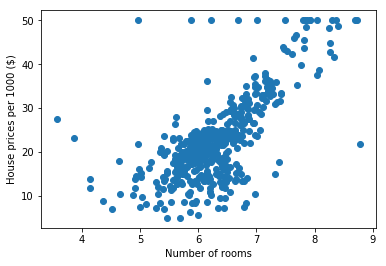

In [11]:
# plotting house prices vs number of rooms
plt.scatter(X_rooms, y)
plt.ylabel('House prices per 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

We can see that number of rooms is correlated to house price, as number of rooms increases, prices go up.

We'll fit a **linear regression** model to our data.

In [12]:
from sklearn.linear_model import LinearRegression

# instantiate and fir our model
reg = LinearRegression()
reg.fit(X_rooms, y) # feature - number of rooms, target - house price

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# create a range of values over which to create the predictions
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
print(prediction_space.shape)
prediction_space[:5]

(50, 1)


array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082]])

In [18]:
# check the regressors predictions over the range of the data
y_pred = reg.predict(prediction_space)
print(y_pred.shape)
y_pred[:5]

(50, 1)


array([[-2.25801069],
       [-1.28854321],
       [-0.31907572],
       [ 0.65039176],
       [ 1.61985925]])

In [31]:
# model accuracy
reg.score(X_rooms, y)

0.4835254559913343

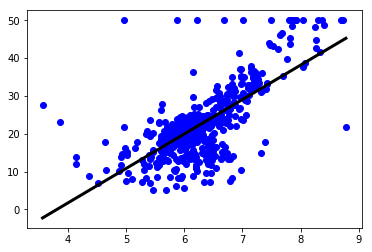

In [19]:
# visualize the results
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

### Predict house price using multiple features

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
# 'MEDV' == target(median value of owner occupied homes in $1000s)
df = pd.read_csv('../data/boston.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NX         506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [23]:
X = df.drop('MEDV', axis=1).values
y = df.MEDV.values

print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (506, 13)
<class 'numpy.ndarray'> (506,)


In [24]:
# reshape y
y = y.reshape(-1, 1)
print(type(y), y.shape)

<class 'numpy.ndarray'> (506, 1)


In [26]:
# split are data to train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.3, random_state=42)

In [27]:
# fit our model
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
# make our predictions
y_pred = reg_all.predict(X_test)
print(y_pred.shape)
y_pred[:5]

(152, 1)


array([[28.64896005],
       [36.49501384],
       [15.4111932 ],
       [25.40321303],
       [18.85527988]])

For classification models we used **accuracy** to determine the performance of our model. For linear regression we'll use **R squared**, this quantifies the amount of variance in the target variable that is predicted by the feature variables. To compute the **R squared** we'll use sklearn `.score()` method.

In [30]:
# determine the models R^2 score
reg_all.score(X_test, y_test)

0.7112260057484929

We can see that the accuracy of our model has improved when it is based on multiple features(71%) as apposed to a single feature(48%)

Generally we'll **never** use linear regression model 'out of the box' like this. Usually we use **regularisation** to implement some constrainints on the models coefficients.